### Display sensitivity maps for EEG and MEG sensors
- Sensitivity maps can be produced from forward operators that indicate how well different sensor types will be able to detect neural currents from different regions of the brain.
- To get the gain matrix

In [2]:
import mne
import matplotlib.pyplot as plt
from mne.datasets import sample

In [3]:
data_path = sample.data_path()

raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
fwd_fname = data_path + '/MEG/sample/sample_audvis-meg-eeg-oct-6-fwd.fif'

subjects_dir = data_path + '/subjects'

In [4]:
# Read the forward solutions with surface orientation
fwd = mne.read_forward_solution(fwd_fname)
mne.convert_forward_solution(fwd,surf_ori=True,copy=False)
leadfield = fwd['sol']['data'] # gain matrix
print("Leadfield size : %d x %d" % leadfield.shape)

Reading forward solution from /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-eeg-oct-6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (7498 sources, 306 channels, free orientations)
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (7498 sources, 60 channels, free orientations)
    MEG and EEG forward solutions combined
    Source spaces transformed to the forward solution coordinate frame
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Leadfield size : 366 x 22494


In [5]:
fwd

<Forward | MEG channels: 306 | EEG channels: 60 | Source space: Surface with 7498 vertices | Source orientation: Free>

In [6]:
print(dir(fwd)),
fwd.viewkeys()

['__class__', '__cmp__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'clear', 'copy', 'fromkeys', 'get', 'has_key', 'items', 'iteritems', 'iterkeys', 'itervalues', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values', 'viewitems', 'viewkeys', 'viewvalues']

dict_keys(['info', 'sol_grad', 'nchan', 'src', 'source_nn', 'sol', 'source_rr', 'source_ori', 'surf_ori', 'coord_frame', '_orig_sol', 'mri_head_t', 'nsource', '_orig_source_ori'])

#### Compute sensitivity maps

In [7]:
grad_map = mne.sensitivity_map(fwd,ch_type='grad',mode='fixed')
mag_map = mne.sensitivity_map(fwd,ch_type='mag',mode='fixed')
eeg_map = mne.sensitivity_map(fwd,ch_type='eeg',mode='fixed')

    204 out of 366 channels remain after picking
    102 out of 366 channels remain after picking
    60 out of 366 channels remain after picking
Adding average EEG reference projection.


In [8]:
mag_map

<SourceEstimate  |  7498 vertices, subject : sample, tmin : 0.0 (ms), tmax : 0.0 (ms), tstep : 1000.0 (ms), data shape : (7498, 1)>

#### Show gain matrix a.k.a. leadfield matrix with sensitivity map

In [9]:
fwd['info']

<Info | 12 non-empty fields
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 366 items (EEG: 60, GRAD: 204, MAG: 102)
    command_line : unicode | 389 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    meas_file : unicode | 21 items
    mri_file : unicode | 29 items
    mri_head_t : Transform | 3 items
    mri_id : dict | 4 items
    nchan : int | 366
    working_dir : unicode | 79 items
    meas_id : NoneType
>

In [10]:
picks_meg = mne.pick_types(fwd['info'],meg=True,eeg=False)
picks_eeg = mne.pick_types(fwd['info'],meg=False,eeg=True)

In [11]:
picks_meg

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

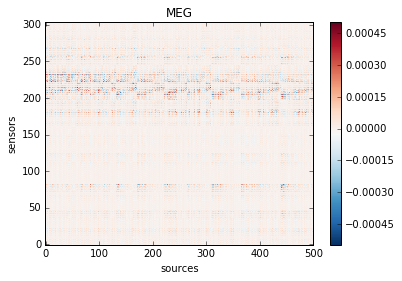

In [12]:
fig,ax = plt.subplots(1,1)
im = ax.imshow(leadfield[picks_meg, :500], origin='lower', aspect='auto',
                   cmap='RdBu_r')
ax.set_title('MEG')
ax.set_xlabel('sources')
ax.set_ylabel('sensors')
plt.colorbar(im, ax=ax, cmap='RdBu_r')

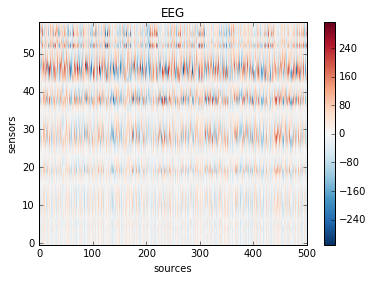

In [13]:
fig,ax = plt.subplots(1,1)
im = ax.imshow(leadfield[picks_eeg, :500], origin='lower', aspect='auto',
                   cmap='RdBu_r')
ax.set_title('EEG')
ax.set_xlabel('sources')
ax.set_ylabel('sensors')
plt.colorbar(im, ax=ax, cmap='RdBu_r')

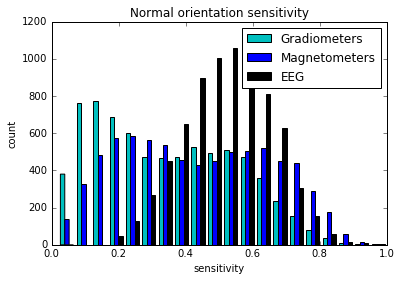

In [15]:
plt.figure()
plt.hist([grad_map.data.ravel(), mag_map.data.ravel(), eeg_map.data.ravel()],
         bins=20, label=['Gradiometers', 'Magnetometers', 'EEG'],
         color=['c', 'b', 'k'])
plt.legend()
plt.title('Normal orientation sensitivity')
plt.xlabel('sensitivity')
plt.ylabel('count')
plt.show()

In [16]:
# 需要提前安装pysurfer
# pip install pysurfer
grad_map.plot(time_label='Gradiometer sensitivity', subjects_dir=subjects_dir,
              clim=dict(lims=[0, 50, 100]))

Using control points [ 0.02108201  0.32186553  1.        ]


<img src='./imgs/Gradiometer sensitivity.png'>

In [14]:
mag_map.plot(time_label='Magnetometers sensitivity', subjects_dir=subjects_dir,
              clim=dict(lims=[0, 50, 100]))

Using control points [ 0.02199014  0.42158497  1.        ]


<img src='./imgs/Magnetometers sensitivity.png'>

### Reference
- https://martinos.org/mne/stable/auto_examples/forward/plot_forward_sensitivity_maps.html#sphx-glr-auto-examples-forward-plot-forward-sensitivity-maps-py